# Understanding Pandas Series and DataFrames - Lab

## Introduction

In this lab, let's get some hands-on practice working with data cleanup using Pandas.

## Objectives
You will be able to:

* Manipulate columns in DataFrames (`df.rename()`, `df.drop()`) 
* Manipulate the index in DataFrames (`df.reindex()`, `df.drop()`, `df.rename()`) 
* Manipulate column datatypes 

## Let's get started!

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
df = pd.read_csv('turnstile_180901.txt')
print(df.shape)
df.head()

(197625, 11)


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Rename all the columns to lower case

In [20]:
oldcolnames = list(df.columns)
newcolnames = [col.lower().strip() for col in oldcolnames]
df.rename(columns={i:j for i,j in zip(oldcolnames,newcolnames)}, inplace=True)

df.columns

Index(['c/a', 'unit', 'scp', 'station', 'linename', 'division', 'date', 'time',
       'desc', 'entries', 'exits'],
      dtype='object')

## Change the Index to be the Line Names

In [21]:
df = df.set_index('linename')
df.head()

,c/a,unit,scp,station,division,date,time,desc,entries,exits
linename,,,,,,,,,,
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Remove the index

In [22]:
df = df.drop('index', axis=0)
df.head()

,c/a,unit,scp,station,division,date,time,desc,entries,exits
linename,,,,,,,,,,
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Create another column 'Num_Lines' that is a count of how many lines pass through a station. Then sort your DataFrame by this column in descending order
*Hint: According to the [data dictionary](http://web.mta.info/developers/resources/nyct/turnstile/ts_Field_Description.txt), LINENAME represents all train lines that can be boarded at a given station. Normally lines are represented by one character. For example, LINENAME 456NQR represents trains 4, 5, 6, N, Q, and R.*

In [25]:
Num_Lines = [len(line) for line in df.index]
df['Num_Lines'] = Num_Lines

In [33]:
df = df.sort_values(['Num_Lines'], ascending=False)
df

,c/a,unit,scp,station,division,date,time,desc,entries,exits,Num_Lines
linename,,,,,,,,,,,
1237ACENQRSW,R151,R033,00-00-00,TIMES SQ-42 ST,IRT,08/30/2018,00:00:00,REGULAR,1417952,3267016,12
1237ACENQRSW,R148,R033,01-06-01,TIMES SQ-42 ST,IRT,08/31/2018,04:00:00,REGULAR,68217145,17201834,12
1237ACENQRSW,R148,R033,01-06-01,TIMES SQ-42 ST,IRT,08/30/2018,20:00:00,REGULAR,68216902,17201755,12
1237ACENQRSW,R151,R033,00-00-03,TIMES SQ-42 ST,IRT,08/28/2018,11:29:43,REGULAR,6291546,8895428,12
1237ACENQRSW,R151,R033,00-00-03,TIMES SQ-42 ST,IRT,08/28/2018,08:00:00,REGULAR,6291234,8894593,12
1237ACENQRSW,R143,R032,02-00-01,TIMES SQ-42 ST,IRT,08/29/2018,12:00:00,REGULAR,1006655,1636005,12
1237ACENQRSW,R151,R033,00-00-02,TIMES SQ-42 ST,IRT,08/25/2018,12:00:00,REGULAR,9430076,7497202,12
1237ACENQRSW,R151,R033,00-00-01,TIMES SQ-42 ST,IRT,08/28/2018,04:00:00,REGULAR,1717447609,320077586,12
1237ACENQRSW,R151,R033,00-00-01,TIMES SQ-42 ST,IRT,08/28/2018,08:00:00,REGULAR,1717447879,320077654,12


## Write a function to clean a column name

In [34]:
def clean(col_name):
    cleaned = col_name.title().strip()
    return cleaned

In [35]:
# This is a list comprehension. It applies your clean function to every item in the list.
# We then reassign that to df.columns
# You shouldn't have to change anything here.
# Your function above should work appropriately here.
df.columns = [clean(col) for col in df.columns] 

In [36]:
# Checking the output, we can see the results.
df.columns

Index(['C/A', 'Unit', 'Scp', 'Station', 'Division', 'Date', 'Time', 'Desc',
       'Entries', 'Exits', 'Num_Lines'],
      dtype='object')

## Group the Data by Day of Week and Plot the Sum of The Numeric Columns

In [37]:
df.Date = pd.to_datetime(df.Date)

In [38]:
df.Date.dt.weekday_name.head()

linename
1237ACENQRSW    Thursday
1237ACENQRSW      Friday
1237ACENQRSW    Thursday
1237ACENQRSW     Tuesday
1237ACENQRSW     Tuesday
Name: Date, dtype: object

Tuesday      28772
Thursday     28447
Monday       28254
Wednesday    28203
Friday       28101
Sunday       28081
Saturday     27767
Name: Date, dtype: int64


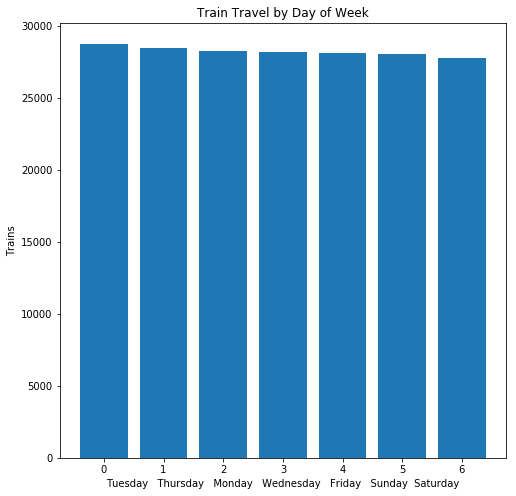

In [41]:
y = list(df['Date'].dt.weekday_name.value_counts())
x = (0,1,2,3,4,5,6)

print(df['Date'].dt.weekday_name.value_counts())

plt.figure(figsize=(8,8))
plt.bar(x,y, label='Train Travel')
plt.xlabel('Tuesday   Thursday   Monday   Wednesday   Friday   Sunday  Saturday')
plt.ylabel('Trains')
plt.title('Train Travel by Day of Week')
plt.show()

## Group the Data by Weekend/Weekday and Plot the Sum of the Numeric Columns

55848
141777


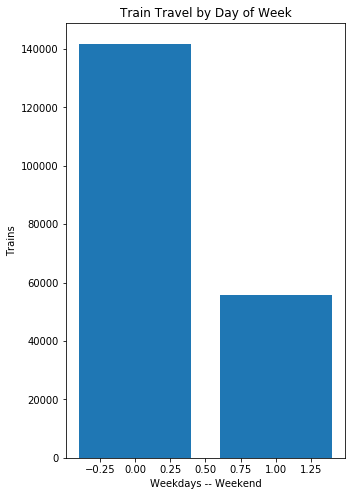

In [120]:
Days = df['Date'].dt.weekday_name.value_counts()

Weekend = Days['Saturday'] + Days['Sunday']
print(Weekend)

Weekdays = Days['Monday'] + Days['Tuesday'] + Days['Wednesday'] + Days['Thursday'] + Days['Friday']   
print(Weekdays)

x = [0,1]
y = [Weekdays, Weekend]
plt.figure(figsize=(5,8))
plt.bar(x,y, label='Train Travel')
plt.xlabel('Weekdays -- Weekend')
plt.ylabel('Trains')
plt.title('Train Travel by Day of Week')
plt.show()

## Analysis Question: 

What is misleading about the day of week and weekend/weekday charts you just plotted?

In [ ]:
# Data is only from a one week sample - train travel may vary during 
# different seasons or from week to week and by train.

## Drop a couple of columns

In [138]:
#df = df.drop('Desc', axis=1)
#df = df.drop('Entries', axis=1)
#df = df.drop('Exits', axis=1)
df.head()

,C/A,Unit,Scp,Station,Division,Date,Time,Num_Lines
linename,,,,,,,,
NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,00:00:00,7
NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,04:00:00,7
NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,08:00:00,7
NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,12:00:00,7
NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,16:00:00,7


## Summary

Great! You practiced your data cleanup skills using Pandas.